<a href="https://colab.research.google.com/github/FabiPYT/pythonProject/blob/master/bitcoin_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Scraping

In [1]:
#Installierte Bibliotheken:
!pip install selenium
#!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

     |████████████████████████████████| 911kB 5.4MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension adobe-flashplugin
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 13 not upgraded.
Need to get 81.0 MB of archives.
After this operation, 273 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 87.0.4280.66-0ubuntu0.18.04.1 [1,122 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 87.0.4280.66-0ubuntu0.18.04.1 [71.7 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-up

In [2]:
#Kursdaten von Investing.com beziehen
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.investing.com/indices/investing.com-btc-usd-historical-data")

#Skript zum Einloggen mit Test Account "FP" 
wd.execute_script("overlay.overlayLogin()")

email = wd.find_element_by_id("loginFormUser_email")
email.send_keys("ProjektPaulFabian@outlook.de")                                

password = wd.find_element_by_id("loginForm_password")
password.send_keys("Projekt123")                         

wd.execute_script("loginFunctions.submitLogin()")

element=wd.find_element_by_class_name("myAccount").text
element

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


'FP'

In [3]:
wd.execute_script("document.getElementById('widgetFieldDateRange').click();")


In [4]:

startDate = wd.find_element_by_id("startDate")
startDate.clear()
startDate.send_keys("01/01/2010")


from datetime import date
today = date.today()
d3 = today.strftime("%m/%d/%Y")
#print("d3 =", d3)
endDate = wd.find_element_by_id("endDate")
endDate.clear()
endDate.send_keys(d3)



In [5]:
wd.find_element_by_id('applyBtn').click()


In [6]:
# Download der CSV Datei
wd.find_element_by_class_name("js-download-data").click()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Investing.com Bitcoin Index Historical Data.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 30, 2021","34,157.4","34,300.0","34,920.9","32,908.5",171.84K,-0.42%
1,"Jan 29, 2021","34,301.8","33,381.7","38,546.0","31,953.3",297.73K,2.78%
2,"Jan 28, 2021","33,374.8","30,408.9","33,790.8","29,911.9",167.39K,9.77%
3,"Jan 27, 2021","30,404.0","32,499.6","32,545.4","29,290.4",194.35K,-6.46%
4,"Jan 26, 2021","32,502.1","32,244.1","32,917.7","30,850.0",139.84K,0.77%


In [ ]:
# Datum formatieren u. sortieren
df['Date']=pd.to_datetime(df.Date)
df.sort_values(by=['Date'], inplace=True)
df.set_index('Date', inplace=True)

# Kurse formatieren u. log 
df['Price'] = df['Price'].replace(',','', regex=True)
df['Price']=pd.to_numeric(df['Price'])
df["log price"]=np.log2(df['Price'])
negativevalue=df["log price"].min()
df["log price"]=df["log price"]+abs(negativevalue)
df

# GRAPH

In [26]:
import datetime as dt

# Y-Achse
values= np.arange(0, (df['log price'].max())+abs(negativevalue) , ((df['log price'].max()-df['log price'].min())-abs(negativevalue))/15)
labels= np.array(2**(values-abs(negativevalue)))
labels=labels.round(decimals=2)
labels=np.where(labels>3,labels.round(),labels)
labels=np.where((labels<3) & (labels>1),labels.round(decimals=1),labels)
#labels

# X-Achse

xlabels=np.arange(df.index.year[0],df.index.year[-1]+5)
val=[]
for i in range(0,len(xlabels)):
  val.append(dt.datetime(xlabels[i], 1, 1).toordinal())

[]

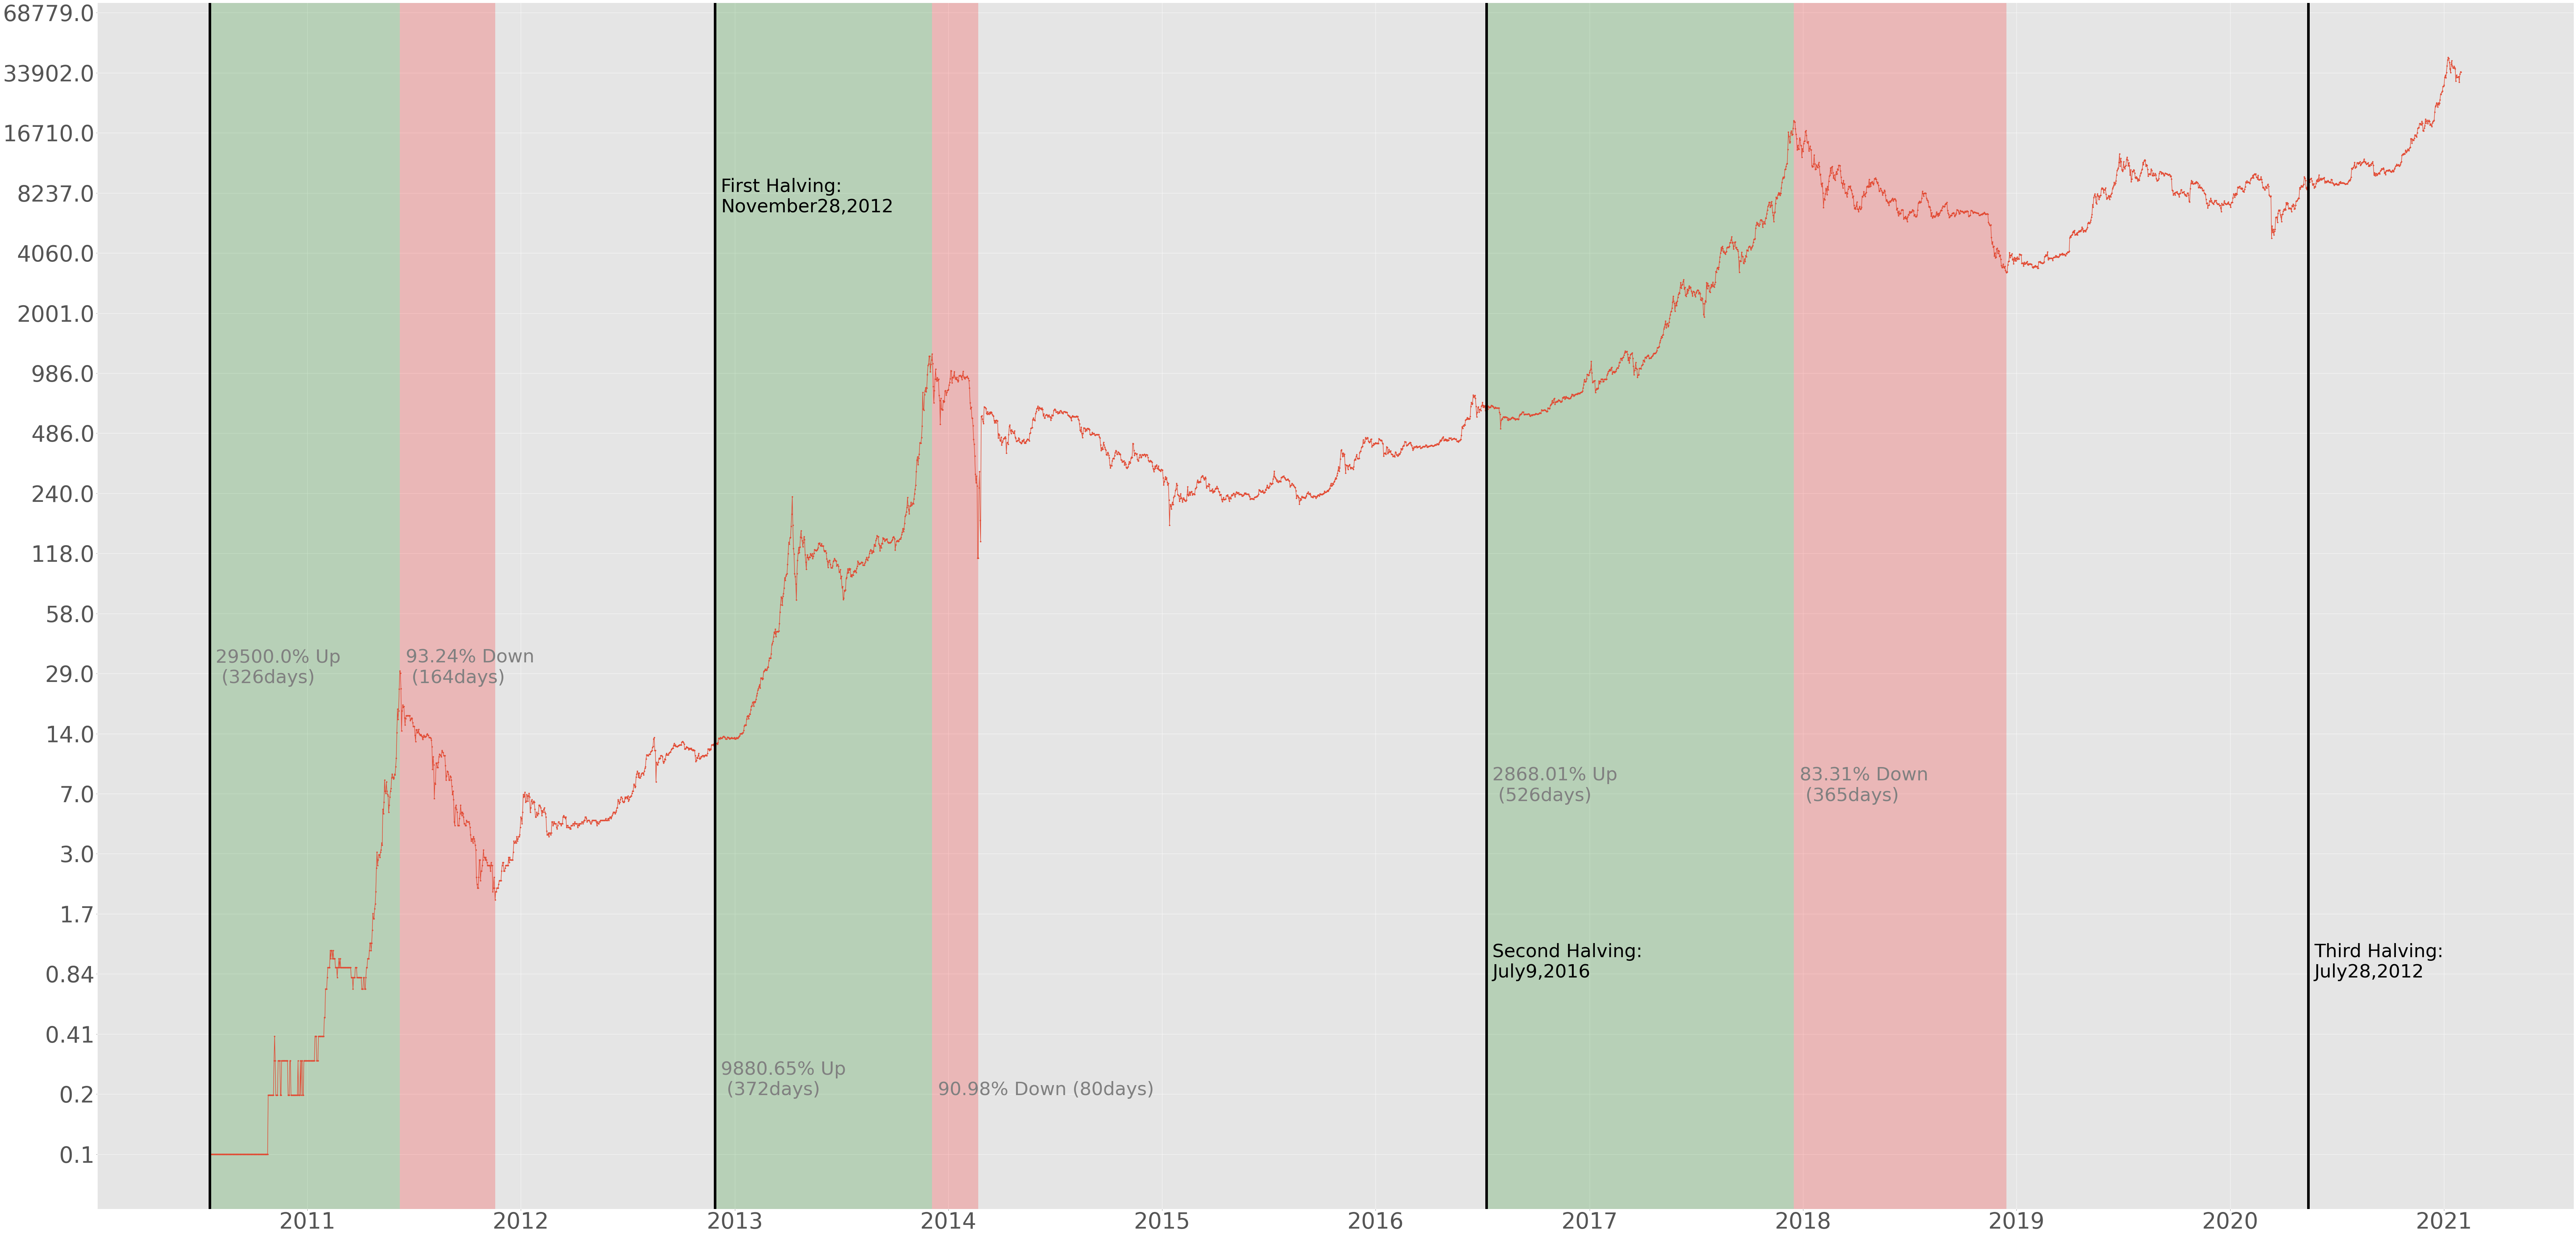

In [30]:
# Graph style / Beschriftungen

from matplotlib import style
#style.use("ggplot")

style = dict(rotation=00, size=50, color='gray')

plt.figure(figsize=(120,60))
plt.plot(df['log price'], marker=".")

plt.yticks(values, labels, fontsize=60)
plt.xticks(val, xlabels,fontsize=60)

# Halving Markierungen
plt.axvline(dt.datetime(2010, 7, 18),color='k', linewidth=7)
plt.axvline(dt.datetime(2012, 11, 28),color='k', linewidth=7)
plt.axvline(dt.datetime(2016, 7, 9),color='k', linewidth=7)
plt.axvline(dt.datetime(2020, 5, 14),color='k', linewidth=7)

# Bull market
halve1=df[df.index<='2012-11-28']
max1=halve1[halve1['Price']==halve1['Price'].max()] 
upchange1=(100*(max1['Price'][0]-halve1['Price'][0])/halve1['Price'][0]).round(decimals=2)
plt.axvspan(dt.datetime(2010, 7, 18),dt.datetime(max1.index.year[0], max1.index.month[0], max1.index.day[0]), facecolor='g', alpha=0.2)
plt.text(dt.datetime(2010, 7, 28), 8,str(upchange1) + "% Up\n (" + str(halve1.loc[:max1.index.values[0]].shape[0]) + "days)", **style)


halve2=df.loc[(df.index >='2012-11-28') & (df.index<='2016-07-09')]
max2=halve2[halve2['Price']==halve2['Price'].max()]
upchange2=(100*(max2['Price'][0]-halve2['Price'][0])/halve2['Price'][0]).round(decimals=2)
plt.axvspan(dt.datetime(2012, 11, 28),dt.datetime(max2.index.year[0], max2.index.month[0], max2.index.day[0]), facecolor='g', alpha=0.2)
plt.text(dt.datetime(2012, 12, 8), 1,str(upchange2) + "% Up\n (" +str(halve2.loc[:max2.index.values[0]].shape[0]) + "days)" , **style)
plt.text(dt.datetime(2012, 12, 8),16,"First Halving:\n"+halve2.index[0].month_name()+str(halve2.index[0].day)+","+str(halve2.index[0].year),size=50)

halve3=df.loc[(df.index >= '2016-07-09') & (df.index<='2020-05-14')]
max3=halve3[halve3['Price']==halve3['Price'].max()]
upchange3=(100*(max3['Price'][0]-halve3['Price'][0])/halve3['Price'][0]).round(decimals=2)
plt.axvspan(dt.datetime(2016, 7, 9),dt.datetime(max3.index.year[0], max3.index.month[0], max3.index.day[0]), facecolor='g', alpha=0.2)
plt.text(dt.datetime(2016, 7, 19), 6,str(upchange3) + "% Up\n (" +str(halve3.loc[:max3.index.values[0]].shape[0]) + "days)" , **style)
plt.text(dt.datetime(2016, 7, 19),3,"Second Halving:\n"+halve3.index[0].month_name()+str(halve3.index[0].day)+","+str(halve3.index[0].year),size=50)

plt.text(dt.datetime(2020, 5, 24),3,"Third Halving:\n"+halve2.index[-1].month_name()+str(halve1.index[-1].day)+","+str(halve1.index[-1].year),size=50)

# Bear Market
bearhalve1=halve1.loc[max1.index.values[0]:]
min1=bearhalve1[bearhalve1['Price']==bearhalve1['Price'].min()]
downchange1=abs((100*(min1['Price'][0]-bearhalve1['Price'][0])/bearhalve1['Price'][0]).round(decimals=2))
plt.axvspan(dt.datetime(bearhalve1.index.year[0], bearhalve1.index.month[0], bearhalve1.index.day[0]),dt.datetime(min1.index.year[0], min1.index.month[0], min1.index.day[0]), facecolor='r', alpha=0.2)
plt.text(dt.datetime(bearhalve1.index.year[0], bearhalve1.index.month[0], bearhalve1.index.day[10]), 8,str(downchange1) + "% Down\n (" +str(bearhalve1.loc[:min1.index.values[0]].shape[0]) + "days)" , **style)

bearhalve2=halve2.loc[max2.index.values[0]:]
min2=bearhalve2[bearhalve2['Price']==bearhalve2['Price'].min()]
downchange2=abs((100*(min2['Price'][0]-bearhalve2['Price'][0])/bearhalve2['Price'][0]).round(decimals=2))
plt.axvspan(dt.datetime(bearhalve2.index.year[0], bearhalve2.index.month[0], bearhalve2.index.day[0]),dt.datetime(min2.index.year[0], min2.index.month[0], min2.index.day[0]), facecolor='r', alpha=0.2)
plt.text(dt.datetime(bearhalve2.index.year[0], bearhalve2.index.month[0], bearhalve2.index.day[10]), 1,str(downchange2) + "% Down (" +str(bearhalve2.loc[:min2.index.values[0]].shape[0]) + "days)" , **style)

bearhalve3=halve3.loc[max3.index.values[0]:]
min3=bearhalve3[bearhalve3['Price']==bearhalve3['Price'].min()]
downchange3=abs((100*(min3['Price'][0]-bearhalve3['Price'][0])/bearhalve3['Price'][0]).round(decimals=2))
plt.axvspan(dt.datetime(bearhalve3.index.year[0], bearhalve3.index.month[0], bearhalve3.index.day[0]),dt.datetime(min3.index.year[0], min3.index.month[0], min3.index.day[0]), facecolor='r', alpha=0.2)
plt.text(dt.datetime(bearhalve3.index.year[0], bearhalve3.index.month[0], bearhalve3.index.day[10]), 6,str(downchange3) + "% Down\n (" +str(bearhalve3.loc[:min3.index.values[0]].shape[0]) + "days)" , **style)

plt.plot()
